# Nonlinear hidden state estimation

Demonstration of hidden state estimation in the deterministic and probabilistic cases with a nonlinear generating function.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import create_agent, create_environment

mpl.style.use("seaborn-deep")

## Nonlinear deterministic agent

In [2]:
# Environment parameters
env_params = {
    "beta_0_star" : 3,    # Linear parameter intercept
    "beta_1_star" : 2,    # Linear parameter slope
    "y_star_std"  : 1e-5  # Standard deviation of sensory data
}

# Initialize environment and agent
env = create_environment(name="static_nonlinear", params=env_params)

# Generate data
x_range = np.linspace(start=-2.5, stop=2.5, num=500)
x_star = 1

# Build environment and generate data
env.build(x_star)
y = env.generate()

In [3]:
# Agent parameters
agent_params = {
    "beta_0" : 3,              # Linear parameter intercept
    "beta_1" : 2,              # Linear parameter slope
    "std_y"  : float(1./100),  # Likelihood standard deviation
    "ax"     : -2.5,           # Prior uniform lower bound
    "bx"     : 2.5,            # Prior uniform upper bound
    "x_range": np.linspace(start=-2.5, stop=2.5, num=500)
}

# Initialize agent
agent = create_agent(name="exact_nonlinear_flat_prior", params=agent_params)

# Build model and infer states
agent.build(y)
agent.infer_state()
agent.store_history()

agent_history = agent.get_history()

/home/sanjeev/Documents/git_repos/faif-book/src/agents/exact_agents.py:59: RuntimeWarning: divide by zero encountered in log
  self.log_model = np.log(self.likelihood) + np.log(self.prior)


<Figure size 432x288 with 0 Axes>

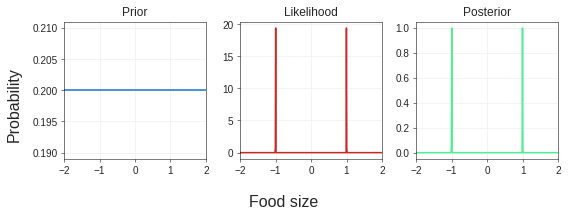

In [4]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, axes = plt.subplots(1,3, facecolor=(1,1,1), figsize=(8,3))

# Get likelihood and prior from agent
likelihood = agent_history.likelihood
prior = agent_history.prior
posterior = agent_history.posterior

# Main plot
axes[0].plot(x_range.tolist(), prior, c="#1874cd")        # Prior
axes[1].plot(x_range.tolist(), likelihood, c="#cd2626")   # Likelihood
axes[2].plot(x_range.tolist(), posterior, c="#4eee94")    # Posterior

# Titles
axes[0].set_title("Prior")
axes[1].set_title("Likelihood")
axes[2].set_title("Posterior")

# Axis global labels
fig.supxlabel("Food size", fontsize=16)
fig.supylabel("Probability", fontsize=16)

# Cosmetic changes and axes ranges
for ax in axes:
    ax.set_xlim([-2, 2])
    ax.axes.grid(which="major", axis="both", c="#f2f2f2")
    plt.setp(ax.spines.values(), color="black", linewidth=0.5)
    ax.tick_params(
        axis='both',          
        which='major',      
        bottom=True,
        left=True,
        color="black",
        width=0.5,
        length=3)
    
fig.tight_layout()

## Nonlinear probabilistic agent

In [5]:
""" Setup environment and generate data """
# Environment parameters
env_params = {
    "beta_0_star" : 1,    # Linear parameter intercept
    "beta_1_star" : 1,    # Linear parameter slope
    "y_star_std"  : 1e-5  # Standard deviation of sensory data
}

# Initialize environment
env = create_environment(name="static_nonlinear", params=env_params)

# Initialize external state and set support
x_range = np.linspace(start=-2.5, stop=2.5, num=500)
x_star  = np.sqrt(2)

# Build environment and generate data
env.build(x_star)
y = env.generate()

In [6]:
""" Setup agent and infer hidden states """
# Agent parameters
agent_params = {
    "beta_0" : 1,      # Linear parameter intercept
    "beta_1" : 1,      # Linear parameter slope
    "std_y"  : 0.5,    # Likelihood standard deviation
    "m_x"    : 2,      # Prior mean
    "s_x"    : 0.5,    # Prior standard deviation
    "x_range": x_range
}

# Initialize agent
agent = create_agent(name="exact_nonlinear", params=agent_params)

# Build model and infer states
agent.build(y)
agent.infer_state()
agent.store_history()

agent_history = agent.get_history()

<Figure size 432x288 with 0 Axes>

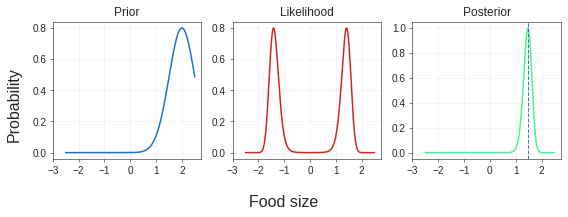

In [7]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, axes = plt.subplots(1,3, facecolor=(1,1,1), figsize=(8,3))

# Get likelihood and prior from agent
likelihood = agent_history.likelihood
prior = agent_history.prior
posterior = agent_history.posterior

# Main plot
axes[0].plot(x_range, prior, c="#1874cd")        # Prior
axes[1].plot(x_range, likelihood, c="#cd2626")   # Likelihood
axes[2].plot(x_range, posterior, c="#4eee94")    # Posterior

# Posterior mode and posterior axis
axes[2].axvline(x=x_range[np.argmax(posterior)], ls="dashed", lw=1)

# Titles
axes[0].set_title("Prior")
axes[1].set_title("Likelihood")
axes[2].set_title("Posterior")

# Axis global labels
fig.supxlabel("Food size", fontsize=16)
fig.supylabel("Probability", fontsize=16)

# Cosmetic changes and axes ranges
for ax in axes:
    ax.xaxis.set_ticks(np.arange(-3, 3, 1))
    ax.axes.grid(which="major", axis="both", c="#f2f2f2")
    plt.setp(ax.spines.values(), color="black", linewidth=0.5)
    ax.tick_params(
        axis='both',          
        which='major',      
        bottom=True,
        left=True,
        color="black",
        width=0.5,
        length=3)
    
fig.tight_layout()

In [8]:
mode = np.round(x_range[np.argmax(posterior)], 3)
print(f"The posterior mode is {mode}. This is the expected or inferred food size, the hidden state estimate, when the observed light intensity is 3")

The posterior mode is 1.478. This is the expected or inferred food size, the hidden state estimate, when the observed light intensity is 3


It is also possible to perform inference of this kind with multiple samples. One only needs to ensure that the dimension of the input is of shape `[N, 1]` where $N$ is the number of samples. 

In [9]:
# Environment parameters
env_params = {
    "beta_0_star" : 1,    # Linear parameter intercept
    "beta_1_star" : 1,    # Linear parameter slope
    "y_star_std"  : 1e-5  # Standard deviation of sensory data
}

# Initialize environment and agent
env = create_environment(name="static_nonlinear", params=env_params)

# Generate data for three different x_star values
x_range = np.linspace(start=-2.5, stop=2.5, num=500) # Range of x_star
x_star  = np.sqrt(2)                                 # External state
N       = 30                                         # Number of samples
y       = np.zeros(N)                                # Empty array for i=30 samples

# Generate N=30 samples
for i in range(N):
    env.build(x_star)
    y[i] = env.generate()

y = np.expand_dims(y, axis=1)

In [10]:
""" Setup agent and infer hidden states """
# Agent parameters
agent_params = {
    "beta_0" : 1,      # Linear parameter intercept
    "beta_1" : 1,      # Linear parameter slope
    "std_y"  : 0.5,    # Likelihood standard deviation
    "m_x"    : 2,      # Prior mean
    "s_x"    : 0.5,    # Prior standard deviation
    "x_range": x_range
}

# Initialize agent
agent = create_agent(name="exact_nonlinear", params=agent_params)

# Build model and infer states
agent.build(y)
agent.infer_state()
agent.store_history()

agent_history = agent.get_history()

<Figure size 432x288 with 0 Axes>

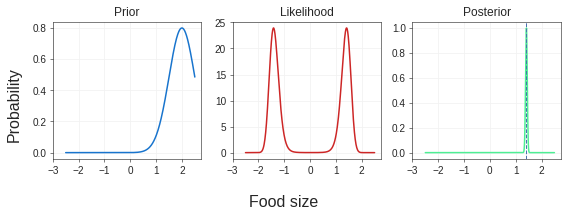

In [11]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, axes = plt.subplots(1,3, facecolor=(1,1,1), figsize=(8,3))

# Get likelihood and prior from agent
likelihood = agent_history.likelihood
prior = agent_history.prior
posterior = agent_history.posterior

# Main plot
axes[0].plot(x_range, prior, c="#1874cd")        # Prior
axes[1].plot(x_range, likelihood.sum(axis=0), c="#cd2626")   # Likelihood
axes[2].plot(x_range, posterior, c="#4eee94")    # Posterior

# Posterior mode and posterior axis
axes[2].axvline(x=x_range[np.argmax(posterior)], ls="dashed", lw=1)

# Titles
axes[0].set_title("Prior")
axes[1].set_title("Likelihood")
axes[2].set_title("Posterior")

# Axis global labels
fig.supxlabel("Food size", fontsize=16)
fig.supylabel("Probability", fontsize=16)

# Cosmetic changes and axes ranges
for ax in axes:
    ax.xaxis.set_ticks(np.arange(-3, 3, 1))
    ax.axes.grid(which="major", axis="both", c="#f2f2f2")
    plt.setp(ax.spines.values(), color="black", linewidth=0.5)
    ax.tick_params(
        axis='both',          
        which='major',      
        bottom=True,
        left=True,
        color="black",
        width=0.5,
        length=3)
    
fig.tight_layout()